In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
# Set the root directory dynamically for Jupyter Notebook
project_root = Path.cwd().parent  # Assuming notebook is in a "Scripts" subfolder
print("Project Root:", project_root)

# Load the datasets
train_data = pd.read_csv(project_root / "data" / "preprocessed_train.csv")
test_data = pd.read_csv(project_root / "data" / "preprocessed_test.csv")

# Inspect the loaded datasets
print("Train Data Head:\n", train_data.head())
print("\nTest Data Head:\n", test_data.head())

In [10]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Define features and target
X = train_data.drop('Survived', axis=1)  # Drop the target column
y = train_data['Survived']  # Target variable

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")


X_train shape: (712, 12), X_val shape: (179, 12)
y_train shape: (712,), y_val shape: (179,)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Adjust max_depth for interpretability
dt_model.fit(X_train, y_train)

# Predict on Validation Data
y_pred = dt_model.predict(X_val)

In [18]:
# Evaluate Model Performance
accuracy = accuracy_score(y_val, y_pred)
print("Decision Tree Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Decision Tree Accuracy: 0.7988826815642458

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



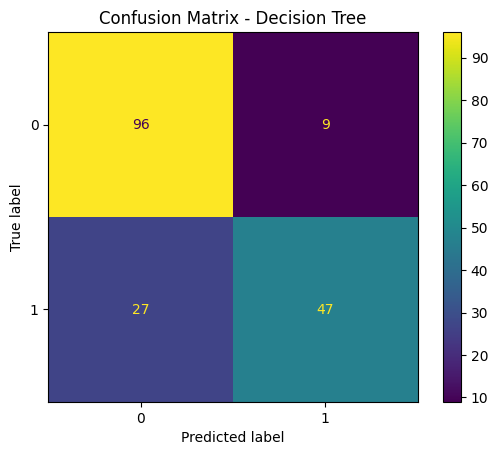

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_).plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [19]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

          Feature  Importance
10       Sex_male    0.531141
0          Pclass    0.148823
4            Fare    0.117243
1             Age    0.099891
6      Cabin_Deck    0.042544
2           SibSp    0.042207
9      Embarked_S    0.012737
3           Parch    0.005414
5     Age_Missing    0.000000
7   Cabin_Missing    0.000000
8      Embarked_Q    0.000000
11    Family_Size    0.000000
